## When moving data from the data lake to the data warehouse, you gain some capabilities, such as transactions, or any type of DML instruction:

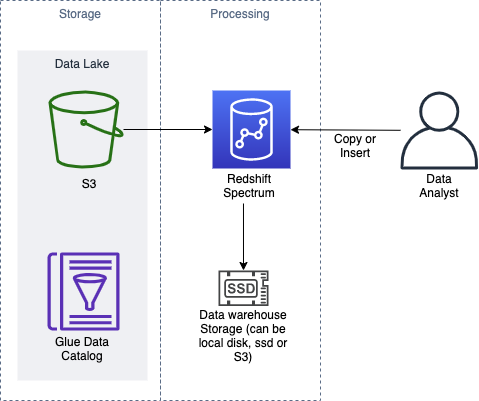

## 1. Install required Python libraries

In [ ]:
!pip install sqlalchemy --upgrade
!pip install simplejson --upgrade
!pip install ipython-sql --upgrade

In [ ]:
# Run this cell to show info about the installed packages
!pip show sqlalchemy
!pip show simplejson
!pip show ipython-sql

## 2. Retrieve your account number

In [ ]:
import simplejson
with open('/opt/ml/metadata/resource-metadata.json') as fh:
    metadata = simplejson.loads(fh.read())
accountid = metadata['ResourceArn'].split(':')[4]
%set_env accountid={accountid}

labs_folder="/home/ec2-user/SageMaker/Analytics_Labs"

In [ ]:
import sqlalchemy
import psycopg2
import simplejson

%reload_ext sql
%config SqlMagic.displaylimit = 25

with open(labs_folder+"/client.creds") as fh:
    creds = simplejson.loads(fh.read())
connect_to_db = "postgresql+psycopg2://" + \
                creds["user_name"] +':'+ creds["password"] +'@'+ \
                creds["host_name"] +':'+ creds["port_num"] +'/'+ \
                creds["db_name"]; # Default database
%sql $connect_to_db

## 11. Create tables in Redshift 

In [ ]:
%sql create table movies (movieid int, title varchar(100), genres varchar(50));

In [ ]:
%sql create table ratings (userid int, movieid int, rating float, timestamp bigint);

In [ ]:
%sql insert into public.movies (select * from data_lake.movies);
%sql select count(*) from public.movies;

In [ ]:
%sql insert into public.ratings (select * from data_lake.ratings);
%sql select count(*) from public.ratings;

In [ ]:
%%sql local_result_set << 
SELECT m.movieid, m.title, avg(cast(r.rating as float)) rating, count(r.rating) votes
FROM public.movies m
JOIN public.ratings r on m.movieid = r.movieid
group by m.movieid, m.title
having count(r.rating) > 1000
order by rating desc
limit 5;

In [ ]:
local_result_set